### Problem 1

> The square target is located 0.5m away. With a 7 mm dimension and a 35mm lens, the size of the target is:

        7mm/35mm = (z/500mm)
        z = (500*7/35)
        z = 100
  The size of the target is 100.
  
  > There are 1024 elements per line. Therefore, the resolution is 1024/100 = 10 elements per mm indicating that for the pair lines
  
  10/2 = 5 lp/mm
  
  
  > The camera can therefore solve _*5 lp/mm.*_

### Problem 2

Assuming:

. Focal length = 17 m ≈ 0.017m

. Object = 0.25 m away

> The diameter d of the retinal image that corresponds to the dot can be computed as shown:
    
    > (x1/0.25) = d/0.017m
    > d = 0.068x1
> Following the observation that the fovea can be modeled as a square array of 580x580 cones, with dimensions 1.5mm x 1.5 mm. The size of the elements and each space is then given by s = [(1.5mm)/1160] = *0.001293 millimeters* ≈ *1.293 * 10^-6 m*
    
> If the fovea size of the imaged dot is less than the size of a single resolution element, we can then assume that the dot will be nearly invisible to the eye. In other words, the eye will not be able to detect a dot whose diameter, x1 , is approximately *0.047(x1) < 1.293 * 10^-6 m, or x1 < 27.66 * 10−6 m.*

### Problem 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
img1 = [[10,30,50], [20, 25, 40], [25, 30, 35]]
img1 = np.array(img1)

img2 = [[15,28,46], [25, 27, 37], [27, 33, 38]]
img2 = np.array(img2)


#Define a funciton to compute the mse
def mse(imageA, imageB):
    #mse is the sum of the squared differences between the actual and processed image
    mse_error = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    mse_error /= float(imageA.shape[0] * imageA.shape[1])
    #Approximate to 4 decimal places
    return round(mse_error,4)


print('Mean Squared Error between the Two Images is: ', mse(img1, img2))

Mean Squared Error between the Two Images is:  11.6667


In [2]:
#Define function to compute signal to noise ratio of the processed image
def snr(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [3]:
#Compute the noise to signal ratio of the original image
snr(img1, axis=None, ddof=0)

array(2.69762897)

In [4]:
#Compute the noise to signal ratio of the processed image
snr(img2, axis=None, ddof=0)

array(3.61969159)

> As noted above, the processed image has a higher noise to signal ratio compared to the original image indicating that during preprocessing, more noise is introduced into the image thus losing some of the original details/information.

### Problem 4

In [12]:
#Install the open cv package to be able to work with cv2
!pip install opencv-python

In [5]:
from PIL import Image
import cv2
from PIL import ImageEnhance


def adjust_brightness(input_image, output_image, factor):
    #Read image from file
    image = Image.open(input_image)
    #adjust brightness
    enhancer_object = ImageEnhance.Brightness(image)
    #enhance the image
    out = enhancer_object.enhance(factor)
    out.save(output_image)

In [6]:
img1 = Image.open('A1/lena_lowcontrast.bmp') 

#Import enhance image
img2 = Image.open('A1/enhanced2.png')

In [7]:
factor = 2
#Apply adjustment to the images
adjust_brightness('A1/lena_lowcontrast.bmp', 'A1/enhanced2.png', factor)

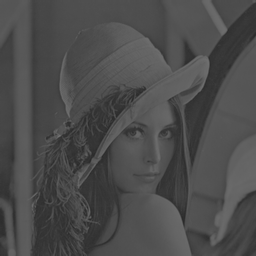

In [8]:
Image.open('A1/lena_lowcontrast.bmp')

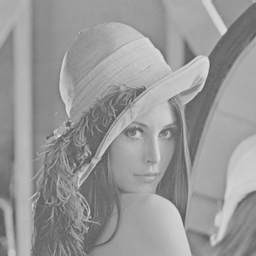

In [9]:
Image.open('A1/enhanced2.png')

#### Plot the historgrams of the two images

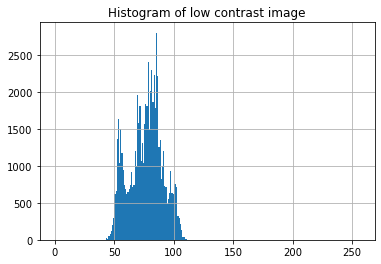

In [10]:
# read the low contrast image

img = cv2.imread('A1/lena_lowcontrast.bmp', 0) 

# find frequency of pixels in range 0-255
histr = cv2.calcHist([img],[0],None,[256],[0,256])
  
# show the plotting graph of an image
plt.hist(img.ravel(),256,[0,256])
plt.grid()
plt.title('Histogram of low contrast image')
plt.show()

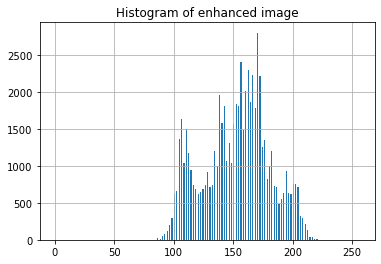

In [11]:
# read the low contrast image

img = cv2.imread('A1/enhanced2.png', 0) 

# find frequency of pixels in range 0-255
histr = cv2.calcHist([img],[0],None,[256],[0,256])
  
# show the plotting graph of an image
plt.hist(img.ravel(),256,[0,256])
plt.title('Histogram of enhanced image')
plt.grid()
plt.show()

>  From the histrograms above, we note that the enhanced image has higher levels of mid and light tones compared to the low contrast image that has dark tones. Morover, the histogram of the original image is relatively narrow indicating that the photo does not have much contrast relative to the much contrasted enhanced image which has a wider historgram as shown in the preceeding plot above.